In [15]:
"""Lean Project Valuation Model - Sensitivity Analysis
"""

import numpy as np
from numpy.random import RandomState
import pandas as pd
from matplotlib import pyplot as plt

from processes import GeometricBrownianMotion
from lpv import LeanProjectValuation

# Plotting constants
FIGSIZE = (8,6)


# Sensitivity Analysis

Holding all other parameters constant, we'll establish valuation sensitivity to each paramater of interest

* Discount Rate - r
* Cashflow Drift - smu
* Cashflow Volatility - sigma
* Development Cost - K
* Initial Cashflow Estimate - C0

## Research Questions
1. What is the critical development cost above which you would be unwilling to fund the project as an investor? At what point does the cost make the project negative npv?
2. How does an ownership split affect the decision's
3. What is the value of the entrepreneur's choice to pivot? (analyze with and without the shock)
4. What is the value of the investor's choice to abandon?

## Results
- what are the fraction of pivots, abandons, and completions for each sensitivity analysis

In [16]:
# Default Simulation Parameters
N = 10000      # no simulations
T = 3          # simulation periods
STEP = 365     # timesteps per period
TIME_ARRAY = np.linspace(0, T, STEP*T+1)
SEED = 1234

# Parameters
CF_INIT = 1.0
K = 1.0
CF_MU = 0.02
CF_SIGMA = 0.2
R = 0.05

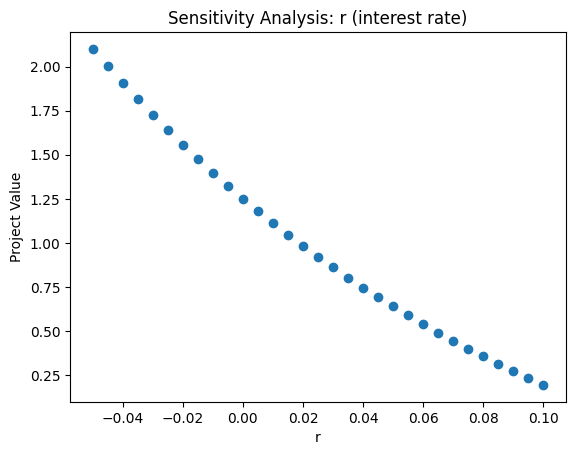


Varying interest rate with the following parameters held constant:


Initial Estimated Cashflow: 1.0

Cashflow Drift (mu): 0.02

Cashflow Volatility (sigma): 0.2

Development Cost per Investment: 1.0

No. Simulations (N): 10000




In [17]:
# Interest Rate
r_range = np.arange(-0.05, 0.1, 0.005)
projects = [LeanProjectValuation(CF_MU, CF_SIGMA, CF_INIT, K, r, 
                                 rand_seed=SEED, no_sims=N) for r in r_range]
vals = [p.valuation(TIME_ARRAY, 3) for p in projects]

# Plot results
plt.title("Sensitivity Analysis: r (interest rate)")
plt.xlabel("r")
plt.ylabel("Project Value")
plt.scatter(r_range, vals)
description=f"""
Varying interest rate with the following parameters held constant:\n\n
Initial Estimated Cashflow: {CF_INIT}\n
Cashflow Drift (mu): {CF_MU}\n
Cashflow Volatility (sigma): {CF_SIGMA}\n
Development Cost per Investment: {K}\n
No. Simulations (N): {N}\n
"""
plt.show()
print(description)


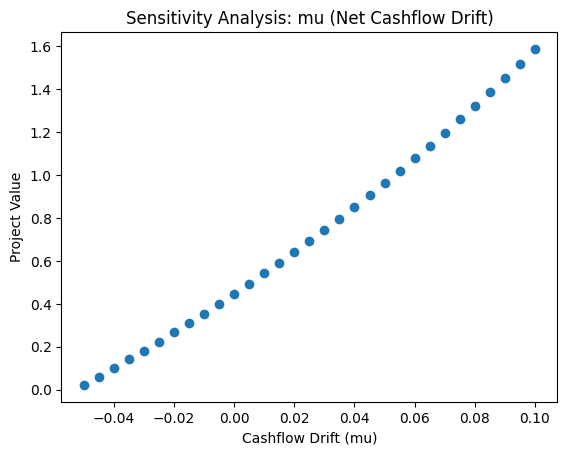


Varying cashflow drift rate (mu) with the following parameters held constant:


Initial Estimated Cashflow: 1.0

Cashflow Volatility (sigma): 0.2

Development Cost per Investment: 1.0

Interest Rate (r): 0.05

No. Simulations (N): 10000




In [18]:
# Cashflow Drift
ra = np.arange(-0.05, 0.1, 0.005)
projects = [LeanProjectValuation(m, CF_SIGMA, CF_INIT, K, R, 
                                 rand_seed=SEED, no_sims=N) for m in ra]
vals = [p.valuation(TIME_ARRAY, 3) for p in projects]

# Plot results
plt.title("Sensitivity Analysis: mu (Net Cashflow Drift)")
plt.xlabel("Cashflow Drift (mu)")
plt.ylabel("Project Value")
plt.scatter(ra, vals)
description=f"""
Varying cashflow drift rate (mu) with the following parameters held constant:\n\n
Initial Estimated Cashflow: {CF_INIT}\n
Cashflow Volatility (sigma): {CF_SIGMA}\n
Development Cost per Investment: {K}\n
Interest Rate (r): {R}\n
No. Simulations (N): {N}\n
"""
plt.show()
print(description)


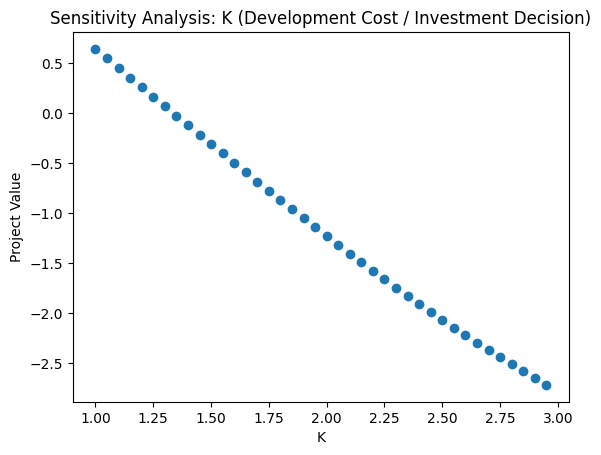


Varying development cost (K) with the following parameters held constant:


Initial Estimated Cashflow: 1.0

Cashflow Drift (mu): 0.02

Cashflow Volatility (sigma): 0.2

Interest Rate (r): 0.05

No. Simulations (N): 10000




In [19]:
# Development Cost
ra = np.arange(1, 3, 0.05)
projects = [LeanProjectValuation(CF_MU, CF_SIGMA, CF_INIT, k, R, 
                                 rand_seed=SEED, no_sims=N) for k in ra]
vals = [p.valuation(TIME_ARRAY, 3) for p in projects]

# Plot results
plt.title("Sensitivity Analysis: K (Development Cost / Investment Decision)")
plt.xlabel("K")
plt.ylabel("Project Value")
plt.scatter(ra, vals)
description=f"""
Varying development cost (K) with the following parameters held constant:\n\n
Initial Estimated Cashflow: {CF_INIT}\n
Cashflow Drift (mu): {CF_MU}\n
Cashflow Volatility (sigma): {CF_SIGMA}\n
Interest Rate (r): {R}\n
No. Simulations (N): {N}\n
"""
plt.show()
print(description)


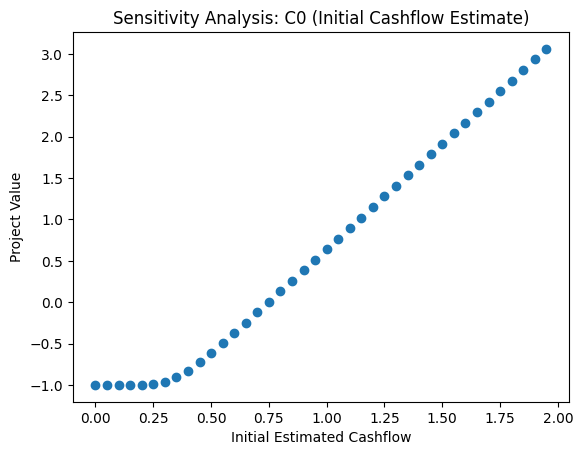


Varying interest rate (r) with the following parameters held constant:


Initial Estimated Cashflow: 1.0

Cashflow Drift (mu): 0.02

Cashflow Volatility (sigma): 0.2

Development Cost (K): 1.0

No. Simulations (N): 10000




In [20]:
# Initial net cf estimate
ra = np.arange(0, 2.0, 0.05)
projects = [LeanProjectValuation(CF_MU, CF_SIGMA, cf_init, K, R, 
                                 rand_seed=SEED, no_sims=N) for cf_init in ra]
vals = [p.valuation(TIME_ARRAY, 3) for p in projects]

# Plot results
plt.title("Sensitivity Analysis: C0 (Initial Cashflow Estimate)")
plt.xlabel("Initial Estimated Cashflow")
plt.ylabel("Project Value")
plt.scatter(ra, vals)
description=f"""
Varying interest rate (r) with the following parameters held constant:\n\n
Initial Estimated Cashflow: {CF_INIT}\n
Cashflow Drift (mu): {CF_MU}\n
Cashflow Volatility (sigma): {CF_SIGMA}\n
Development Cost (K): {K}\n
No. Simulations (N): {N}\n
"""
plt.show()
print(description)


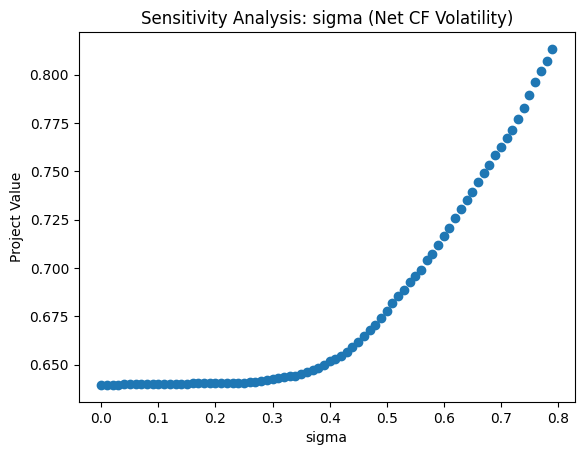


Varying cashflow volatility (sigma) with the following parameters held constant:


Initial Estimated Cashflow: 1.0

Cashflow Drift (mu): 0.02

Development Cost per Investment: 1.0

Interest Rate (r): 0.05

No. Simulations (N): 10000




In [21]:
# Cashflow Vol
ra = np.arange(0, 0.8, 0.01)
projects = [LeanProjectValuation(CF_MU, sigma, CF_INIT, K, R, 
                                 rand_seed=SEED,
                                 no_sims=N) for sigma in ra]
vals = [p.valuation(TIME_ARRAY, 3) for p in projects]

# Plot results
plt.title("Sensitivity Analysis: sigma (Net CF Volatility)")
plt.xlabel("sigma")
plt.ylabel("Project Value")
plt.scatter(ra, vals)
description=f"""
Varying cashflow volatility (sigma) with the following parameters held constant:\n\n
Initial Estimated Cashflow: {CF_INIT}\n
Cashflow Drift (mu): {CF_MU}\n
Development Cost per Investment: {K}\n
Interest Rate (r): {R}\n
No. Simulations (N): {N}\n
"""
plt.show()
print(description)
